# ICS 471-Deep Learning using Keras-Session 02

We will cover how to develop real-world deep learning models using Keras.

Today, we will go deeper into keras and see how to do the following:


*   Read data from folders
*   Data preprocessing
> Data Augmentation

*   Checkpoints 
*   Hyperparameters tuning









### Download the flowers dataset

This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains five sub-directories, one per class:

```
flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [ ]:
import pathlib
import tensorflow as tf

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 10s 0us/step


In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


After downloading (218MB), you should now have a copy of the flower photos available. There are 3,670 total images:

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Each directory contains images of that type of flower. Here are some roses:

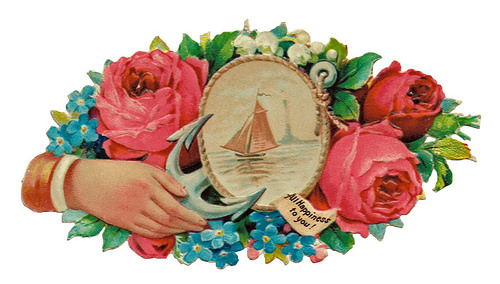

In [ ]:
import PIL
import PIL.Image
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

## Load data using a Keras utility

Let's load these images off disk. There are several methods to read the data from the disk. In this class, we will explain two methods: .

1.   Using the helpful `ImageDataGenerator.flow_from_directory` utility
2.   Using the helpful `tf.keras.utils.image_dataset_from_directory` utility



### Create a dataset and Data augmentation
In this part, we will create `ImageDataGenerator` for data augmentation, then we will read the data using `ImageDataGenerator.flow_from_directory`:


In [ ]:
#Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. You will use 80% of the images for training and 20% for validation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenrator used for split data and perform data augmentation
datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest', validation_split=0.2)

train_ds = datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),        
        batch_size=batch_size, subset='training')

images, labels = next(train_ds)
print(images.shape)

# validation part
val_ds = datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),        
        batch_size=batch_size, subset='validation')

val_images, labels = next(val_ds)
print(val_images.shape)

'''
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
''' 

Found 2939 images belonging to 5 classes.
(32, 180, 180, 3)
Found 731 images belonging to 5 classes.
(32, 180, 180, 3)


'\ntrain_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\nval_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n'

### Visualize the data

Here are the first nine images from the training dataset.

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


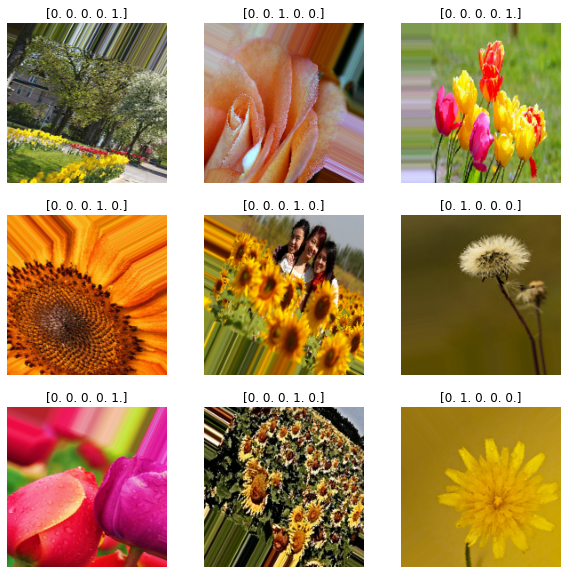

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(10, 10))
images, labels = next(train_ds)
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i,:,:,:].astype("uint8"))
  plt.title(labels[i])
  plt.axis("off")




You can train a model using these datasets by passing them to `model.fit` (shown later in this tutorial). If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [ ]:
x, y = next(train_ds)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 5)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on either of these tensors to convert them to a `numpy.ndarray`.

## Building models with the Keras Functional API

After defining your input(s), you can chain layer transformations on top of your inputs,
 until your final output:

In [ ]:
#import tensorflow.keras 

from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from keras import Model, Input

def build_model():
   
  # Let's say we expect our inputs to be RGB images of arbitrary size
  input_img = Input(shape=(180, 180, 3))
  x = Conv2D(32, 5, activation='relu')(input_img)
  x = Conv2D(32, 3, activation='relu')(x)
  x = MaxPooling2D()(x)
  x = Conv2D(32, 3, activation='relu')(x)
  x = MaxPooling2D()(x)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  pred_class = Dense(5, activation="softmax")(x)

  model = Model(inputs=input_img, outputs=pred_class)
  '''
  
  # same model but sequential
  from keras.models import Sequential
  model = Sequential()
  model.add(Conv2D(32, 3, activation='relu'))
  model.add(Conv2D(32, 3, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(32, 3, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  
  '''
  return model

In [ ]:
myModel = build_model()


In [ ]:
# Let's check out what the model summary looks like:
myModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 176, 176, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 174, 174, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                         

You can also plot the model as a graph:

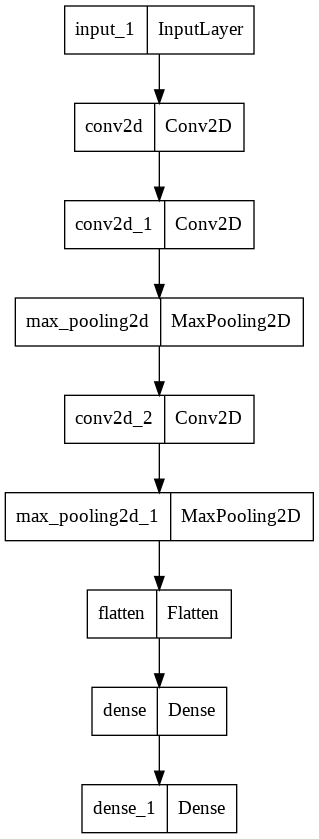

In [ ]:
import tensorflow.keras.utils as utils
utils.plot_model(myModel, "my_first_model.png")

And, optionally, display the input and output shapes of each layer in the plotted graph:

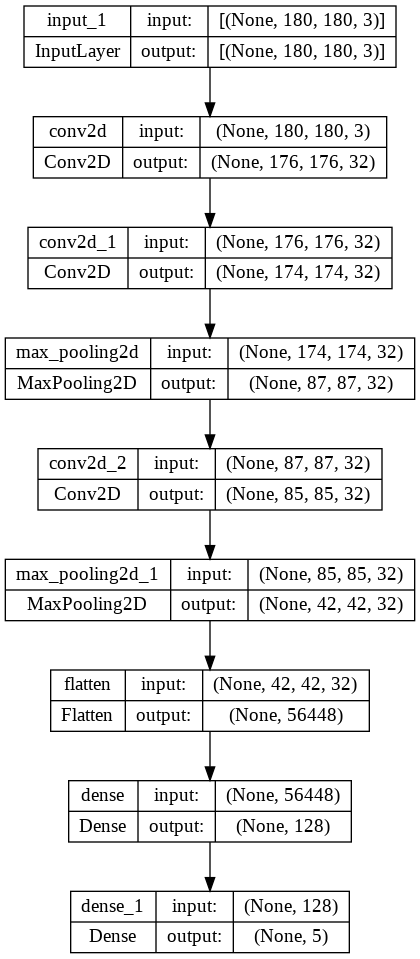

In [ ]:
utils.plot_model(myModel, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
from keras.optimizers import Adam as adam

myModel.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam(learning_rate=1e-3),
               metrics=['accuracy'])

Note: You will only train for a few epochs so this tutorial runs quickly.

In [ ]:
modelHistory = myModel.fit(train_ds, validation_data=val_ds, batch_size=256, epochs=5)

Epoch 1/5
92/92 [==============================] - 39s 423ms/step - loss: 1.4526 - accuracy: 0.4080 - val_loss: 1.4954 - val_accuracy: 0.3776
Epoch 2/5
92/92 [==============================] - 35s 385ms/step - loss: 1.3776 - accuracy: 0.4542 - val_loss: 1.4558 - val_accuracy: 0.3953
Epoch 3/5
92/92 [==============================] - 36s 388ms/step - loss: 1.2720 - accuracy: 0.5012 - val_loss: 1.3484 - val_accuracy: 0.4651
Epoch 4/5
92/92 [==============================] - 35s 380ms/step - loss: 1.2003 - accuracy: 0.5271 - val_loss: 1.3039 - val_accuracy: 0.5157
Epoch 5/5
92/92 [==============================] - 36s 383ms/step - loss: 1.1955 - accuracy: 0.5216 - val_loss: 1.2820 - val_accuracy: 0.4843


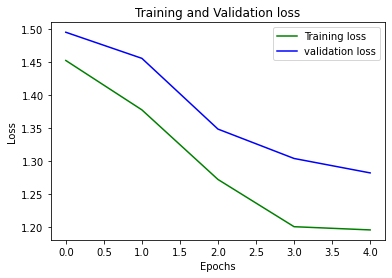

In [ ]:
loss_train = modelHistory.history['loss']
loss_val = modelHistory.history['val_loss']
epochs = range(len(loss_train))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


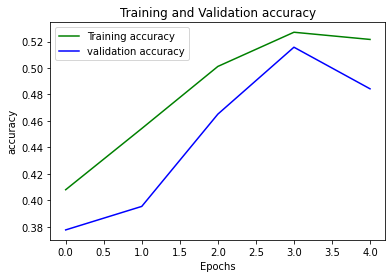

In [ ]:
acc_train = modelHistory.history['accuracy']
acc_val = modelHistory.history['val_accuracy']
epochs = range(len(acc_train))
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


### Using callbacks for checkpointing (and more)

If training goes on for more than a few minutes, it's important to save your model at
 regular intervals during training. You can then use your saved models
to restart training in case your training process crashes (this is important for
multi-worker distributed training, since with many workers at least one of them is
 bound to fail at some point).

An important feature of Keras is **callbacks**, configured in `fit()`. Callbacks are
 objects that get called by the model at different point during training, in particular:

- At the beginning and end of each batch
- At the beginning and end of each epoch

Callbacks are a way to make model trainable entirely scriptable.

You can use callbacks to periodically save your model. Here's a simple example: a
 `ModelCheckpoint` callback
configured to save the model at the end of every epoch. The filename will include the
 current epoch.

```python
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='path/to/my/model_{epoch}',
        save_freq='epoch')
]
model.fit(dataset, epochs=2, callbacks=callbacks)
```

You can also use callbacks to do things like periodically changing the learning of your
optimizer, streaming metrics to a Slack bot, sending yourself an email notification
 when training is complete, etc.

For detailed overview of what callbacks are available and how to write your own, see
the [callbacks API documentation](https://github.com/keras-team/keras-io/tree/master/guides/api/callbacks/) and the
[guide to writing custom callbacks](/https://github.com/keras-team/keras-io/tree/master/guides/writing_your_own_callbacks/).

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#chkPoints = ModelCheckpoint(filepath='path/to/my/model_{epoch}', save_freq='epoch') # all models will be saved





chkPoints = ModelCheckpoint(filepath='path/to/my/best_model.h5',verbose = 1, save_best_only = True) #only best model


In [ ]:
modelHistory = myModel.fit(train_ds, validation_data=val_ds, epochs=1000, callbacks=[early_stopping, chkPoints])

Epoch 1/1000
92/92 [==============================] - ETA: 0s - loss: 1.3956 - accuracy: 0.3998
Epoch 1: val_loss improved from inf to 1.37004, saving model to path/to/my/best_model.h5
92/92 [==============================] - 40s 434ms/step - loss: 1.3956 - accuracy: 0.3998 - val_loss: 1.3700 - val_accuracy: 0.4131
Epoch 2/1000
92/92 [==============================] - ETA: 0s - loss: 1.2999 - accuracy: 0.4699
Epoch 2: val_loss improved from 1.37004 to 1.27882, saving model to path/to/my/best_model.h5
92/92 [==============================] - 39s 419ms/step - loss: 1.2999 - accuracy: 0.4699 - val_loss: 1.2788 - val_accuracy: 0.4870
Epoch 3/1000
92/92 [==============================] - ETA: 0s - loss: 1.2469 - accuracy: 0.5165
Epoch 3: val_loss improved from 1.27882 to 1.22655, saving model to path/to/my/best_model.h5
92/92 [==============================] - 39s 419ms/step - loss: 1.2469 - accuracy: 0.5165 - val_loss: 1.2265 - val_accuracy: 0.5007
Epoch 4/1000
92/92 [=====================

### Monitoring training progress with TensorBoard

Staring at the Keras progress bar isn't the most ergonomic way to monitor how your loss
 and metrics are evolving over time. There's a better solution:
[TensorBoard](https://www.tensorflow.org/tensorboard),
a web application that can display real-time graphs of your metrics (and more).

To use TensorBoard with `fit()`, simply pass a `keras.callbacks.TensorBoard` callback
 specifying the directory where to store TensorBoard logs:


```python
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(dataset, epochs=2, callbacks=callbacks)
```

You can then launch a TensorBoard instance that you can open in your browser to monitor
 the logs getting written to this location:

```
tensorboard --logdir=./logs
```

What's more, you can launch an in-line TensorBoard tab when training models in Jupyter
 / Colab notebooks.
[Here's more information](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks).

In [ ]:
## your task to do it